<a href="https://colab.research.google.com/github/EdwarRangel/Parcial/blob/main/UP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFORME ESTADÍSTICO:**

### **¿Cómo se relaciona el tiempo de gestación y la talla de los nacidos vivos en Colombia?**


**AUTORES:**

**LAURA SUAREZ**

**EDWAR RANGEL**

**VALENTINA MORENO**

**MARLON PEÑA**




**ASIGNATURA:
ESTADÍSTICA I**




  
**AÑO:
2024**

# **Introdución**
El estudio de las variables relacionadas con el nacimiento es fundamental para comprender mejor la salud materna e infantil. En Colombia, el análisis del tiempo de gestación (T_GES) y la talla de nacimiento (TALLA_NAC) de los recién nacidos vivos proporciona una visión crítica sobre el bienestar de los recién nacidos y permite identificar posibles riesgos y áreas de mejora en los servicios de salud.

El tiempo de gestación, medido en semanas, es un indicador clave que influye en la salud del recién nacido. Un tiempo de gestación adecuado es esencial para el desarrollo fetal óptimo, y variaciones significativas pueden estar asociadas con complicaciones de salud tanto para la madre como para el hijo. Por otro lado, la talla de nacimiento es una medida directa del crecimiento y desarrollo del feto durante el embarazo. Esta variable puede reflejar factores nutricionales, genéticos y ambientales que afectan al crecimiento prenatal.

Además de analizar estas variables de forma independiente, surge una pregunta importante: ¿cómo se relacionan el tiempo de gestación y la talla de nacimiento? ¿Existe una dependencia significativa entre estas dos variables, y cómo esta posible asociación puede influir en las prácticas de salud materna e infantil en Colombia? Comprender esta relación puede proporcionar información valiosa para la atención médica y la planificación de intervenciones preventivas.

# **CÓDIGO Y SUS RESULTADOS**

In [ ]:

from google.colab import files # Para cargar archivos en google colab
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [ ]:
uploaded = files.upload()

Saving nac2020.csv to nac2020.csv


In [ ]:
io_csv = io.BytesIO(uploaded['nac2020.csv'])
tabla = pd.read_csv(io_csv, sep = ",", index_col=0, encoding='latin-1')
tabla.head(3)

,COD_MUNIC,AREANAC,SIT_PARTO,OTRO_SIT,SEXO,PESO_NAC,TALLA_NAC,ANO,MES,ATEN_PAR,...,AREA_RES,N_HIJOSV,FECHA_NACM,N_EMB,SEG_SOCIAL,IDCLASADMI,EDAD_PADRE,NIV_EDUP,ULTCURPAD,PROFESION
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
44,560,3,2,NaN,2,9,9,2020,11,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5
44,560,3,2,NaN,1,9,9,2020,10,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5
44,560,3,2,NaN,1,9,9,2020,10,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5


In [ ]:
tabla2 = tabla[["T_GES", "TALLA_NAC", ]]
tabla2.head(4)

,T_GES,TALLA_NAC
COD_DPTO,,
44,6,9
44,6,9
44,6,9
44,6,9


In [ ]:
df3 = tabla1[(tabla1["T_GES"] < 6) & (tabla2["TALLA_NAC"] != 9)]
df3.head(4)

,T_GES,TALLA_NAC
COD_DPTO,,
52,4,4
20,4,5
27,4,5
27,4,4


In [ ]:
df3.TALLA_NAC.head(2)
df3.TALLA_NAC = df3.TALLA_NAC.astype(str)
df3.TALLA_NAC.head(2)
df3.T_GES.head(2)
df3.T_GES = df3.T_GES.astype(str)
df3.T_GES.head(2)

<ipython-input-35-71bb04edbd0b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.TALLA_NAC = df3.TALLA_NAC.astype(str)
<ipython-input-35-71bb04edbd0b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.T_GES = df3.T_GES.astype(str)


COD_DPTO
52    4
20    4
Name: T_GES, dtype: object

In [ ]:
df3.loc[(df3.TALLA_NAC == "1"), "TALLA_NAC"], df3.loc[(df3.TALLA_NAC == "2"), "TALLA_NAC"], df3.loc[(df3.TALLA_NAC == "3"), "TALLA_NAC"], df3.loc[(df3.TALLA_NAC == "4"), 'TALLA_NAC'] = "0-20", "20-29", "30-39", "40-49"
df3.loc[(df3.TALLA_NAC == "5"), 'TALLA_NAC'], df3.loc[(df3.TALLA_NAC == "6"), 'TALLA_NAC'], = "50-59", "60-MÁS",
df3.loc[(df3.T_GES == "1"), "T_GES"], df3.loc[(df3.T_GES == "2"), "T_GES"], df3.loc[(df3.T_GES == "3"), "T_GES"], df3.loc[(df3.T_GES == "4"), 'T_GES'] = "0-22", "22-27", "28-37", "38-41"
df3.loc[(df3.T_GES == "5"), 'T_GES'], df3.loc[(df3.T_GES == "6"), 'T_GES'], = "42-Más", "Ignorado",
df3.head(5)

,T_GES,TALLA_NAC
COD_DPTO,,
52,38-41,40-49
20,38-41,50-59
27,38-41,50-59
27,38-41,40-49
27,38-41,50-59


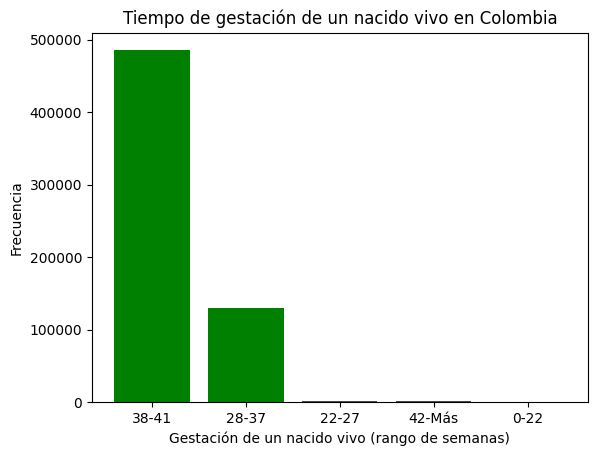

In [ ]:
x_values = df3.T_GES.unique()
y_values = df3.T_GES.value_counts().tolist()
plt.bar(x_values, y_values, color = "green")
plt.title('Tiempo de gestación de un nacido vivo en Colombia')
ax = plt.subplot()  # Axis
ax.set_xlabel('Gestación de un nacido vivo (rango de semanas)')
ax.set_ylabel('Frecuencia')
plt.show()



*   Cerca de 490000 niños recien nacidos vivos en Colombia tuvieron 38 a 41 semanas de gestación
*   Cerca de 130000 niños recien nacidos vivos en Colombia tuvieron 28 a 37 semanad de gestación


*   Los rangos de 22 a 27 semanas y 42 o mas semanas tienen menos de 100000 niños recien nacidos vivos en Colombia






In [ ]:
sizes = np.array(y_values)
sizes

array([485433, 130485,   2236,   1163,     28])

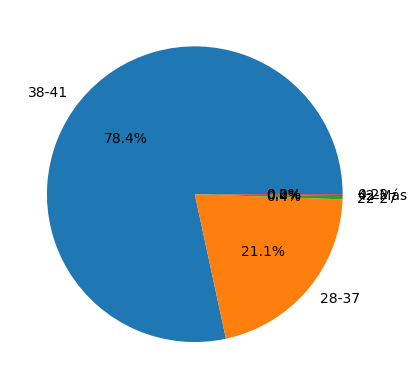

In [ ]:
plt.pie(y_values, labels = x_values, autopct='%1.1f%%')
plt.show()



*   Aproximadamente el 78.19% de niños recien nacidos vivos en Colombia tuvieron 38 a 41 semanas de gestación
*   Aproximadamente el 21.01% de ninños recien nacidos vivos en Colombia tuvieron 28 a 37 semanas de gestación


*   Aproximadamente el 0.36% de niños recien nacidos vivos en Colombia tuvieron 22 a 27 semanas de gestación
*   Aproximadamente el 0.18% de niños recien nacidos vivos en Colombia tuvieron 42 o mas semanas de gestación





In [ ]:
len(df3.T_GES)

619345

In [ ]:
porcentaje = [(x/len(df2.T_GES)*100) for x in y_values]
print(x_values)
print(porcentaje)

['38-41' '28-37' '22-27' '42-Más' '0-22']
[78.19134799227481, 21.017932531929183, 0.3601647479893754, 0.18733077008570825, 0.004510113123301661]


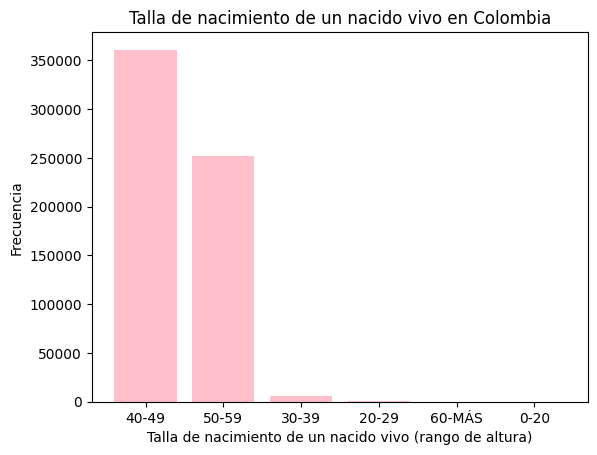

In [ ]:

x_values = df3.TALLA_NAC.unique()
y_values = df3.TALLA_NAC.value_counts().tolist()
plt.bar(x_values, y_values, color = "pink")
plt.title('Talla de nacimiento de un nacido vivo en Colombia')
ax = plt.subplot()  # Axis
ax.set_xlabel('Talla de nacimiento de un nacido vivo (rango de altura)')
ax.set_ylabel('Frecuencia')
plt.show()




*   Cerca de 360000 niños recien nacidos vivos en Colombia nacieron con 40 a 49 centimetros de altura
*   Cerca de 250000 niños recien nacidos vivos en Colombia nacieron con 50 a 59 centimetros de altura


*   Cerca de 10000 niños recien nacidos vivos en Colombia nacieron con 30 a 39 centimetros de altura






In [ ]:
sizes = np.array(y_values)
sizes

array([361010, 252113,   5695,    411,    114,      2])

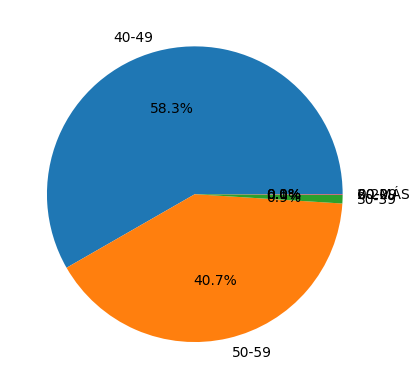

In [ ]:
plt.pie(y_values, labels = x_values, autopct='%1.1f%%')
plt.show()



*   Aproximadamente el 58.14% de niños recien nacidos vivos en Colombia nacieron con 40 a 49 centimetros de altura
*   Aproximadamente el 40.60% de niños recien nacidos vivos en Colombia nacieron con 50 a 59 centimetros de altura


*   Aproximadamente el 0.91% de niños recien nacidos vivos en Colombia nacieron con 30 a 39 centimetros de altura
*   Aproximadamente el 0.07% de niños recien nacidos vivos en Colombia nacieron con una altura menor a 30 centimetros





In [ ]:
len(df3.TALLA_NAC)

619345

In [ ]:
porcentaje = [(x/len(df2.TALLA_NAC)*100) for x in y_values]
print(x_values)
print(porcentaje)

['40-49' '50-59' '30-39' '20-29' '60-MÁS' '0-20']
[58.14985495154045, 40.609219637676844, 0.9173247941858198, 0.0662020176313208, 0.018362603430585333, 0.00032215093737869]


#Tablas de contingencia

In [ ]:
tabla_cont = pd.crosstab(df3.T_GES, df3["TALLA_NAC"])
tabla_cont

TALLA_NAC,0-20,20-29,30-39,40-49,50-59,60-MÁS
T_GES,,,,,,
0-22,0,22,6,0,0,0
22-27,2,260,1872,102,0,0
28-37,0,53,3619,89212,37593,8
38-41,0,76,198,162543,322515,101
42-Más,0,0,0,256,902,5


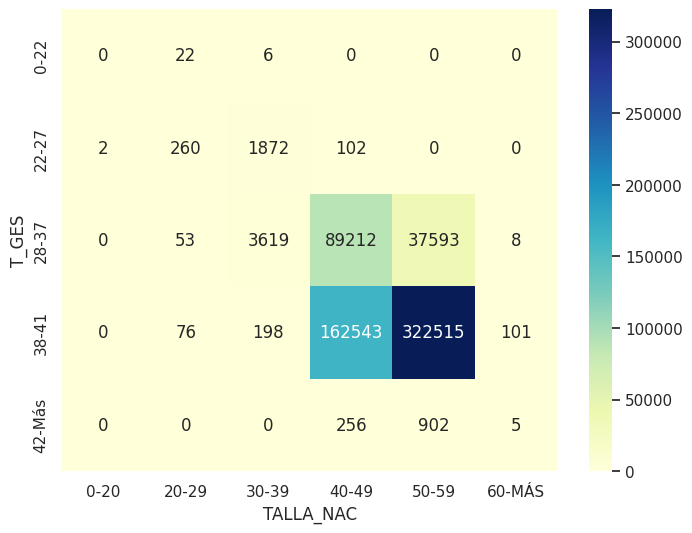

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(tabla_cont,  annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.show()



*   El 26.24% de niños recien nacidos vivos en Colombia que tuvieron un periodo de gestacion de entre 38 a 41 semana nacieron con una talla de 40 a 49 centimetros
*   El 14.40% de niños recien nacidos vivos en Colombia que tuvieron un periodo de gestacion de entre 28 a 37 semana nacieron con una talla de 40 a 49 centimetros


*   El 52.07% de niños recien nacidos vivos en Colombia que tuvieron un periodo de gestacion de entre 38 a 41 semana nacieron con una talla de 50 a 59 centimetros
*   El 6.06% de niños recien nacidos vivos en Colombia que tuvieron un periodo de gestacion de entre 28 a 37 semana nacieron con una talla de 50 a 59 centimetros


*   El 64.44% de niños recien nacidos vivos en Colombia que se sabe que nacieron con un talla de 40 a 49 centimetros tuvieron un periodo de 38 a 41 semanas de gestacón
*   El 35.38% de niños recien nacidos vivos en Colombia que se sabe que nacieron con un talla de 40 a 49 centimetros tuvieron un periodo de 28 a 37 semanas de gestacón


*   El 89.33% de niños recien nacidos vivos en Colombia que se sabe que nacieron con un talla de 50 a 59 centimetros tuvieron un periodo de 38 a 41 semanas de gestacón
*   El 10.41% de niños recien nacidos vivos en Colombia que se sabe que nacieron con un talla de 50 a 59 centimetros tuvieron un periodo de 28 a 37 semanas de gestacón


*   El 33.48% de niños recien nacidos vivos en Colombia que se sabe que tuvieron un periodo de 38 a 41 semanas de gestacion nacieron con un talla de 40 a 49 centimetros
*   El 66.43% de niños recien nacidos vivos en Colombia que se sabe que tuvieron un periodo de 38 a 41 semanas de gestacion nacieron con un talla de 50 a 59 centimetros


*   El 68.36% de niños recien nacido vivos en Colombia que se sabe que tuvieron un periodo de 28 a 37 semanas de gestacion nacieron con una talla de 40 a 49 centimetros
*   El 68.36% de niños recien nacido vivos en Colombia que se sabe que tuvieron un periodo de 28 a 37 semanas de gestacion nacieron con una talla de 50 a 59 centimetros












In [ ]:
res = stats.chi2_contingency(tabla_cont)
chi, valor_p, _, _ = res
print(f"El valor de la estadística Chi cuadrado es {chi} y el valor p es d {valor_p}")

El valor de la estadística Chi cuadrado es 305687.2032391818 y el valor p es d 0.0


Como el valor p =0.0 < 0.05
 se rechaza la hipótesis nula, es decir, no se rechaza con una confianza del 95% que la talla de naciemiento y la gestación de un reciendo nacido estén asociadas para los individuos recién nacidos en Colombia.

In [ ]:
import math
coeficiente_contingencia = math.sqrt(chi/(chi + len(df3.TALLA_NAC)))
coeficiente_phi = math.sqrt(chi/len(df3.TALLA_NAC))
coeficiente_v_cramer = math.sqrt(chi/(len(df3.TALLA_NAC)*min(6-1, 6-1)))
print(f"Los coeficientes de contingencia, Phi y V de Cramer están respectivamente dados por {coeficiente_contingencia}, {coeficiente_phi} y {coeficiente_v_cramer}")


Los coeficientes de contingencia, Phi y V de Cramer están respectivamente dados por 0.5748575017974198, 0.7025420300976799 y 0.3141863472698231


# **RESUMEN DEL ANÁLISIS DE LOS RESULTADOS**
**1.¿Cómo se comporta la variable tiempo de gestación de un nacido vivo en Colombia (T_GES)?**

La variable que nos habla sobre el tiempo de gestación de un nacido vivo en Colombia nos indica que cuando el tiempo de gestación se encuentra entre las 38 y las 41 semanas es mas probable que el niño nazca vivo a diferencia de cuando un niño tiene menos de 27 semanas de gestación las probabilidades decaen exponencialmente, además podemos notar que existe una tendencia a que el tiempo de gestación sea entre 38 y 41 semanas, Podemos notar que la cantidad de niños nacidos vivos en Colombia depende del tiempo de gestación.

**2. ¿Cómo se comporta la variable talla de nacimiento de un nacido vivo en Colombia**
(TALLA_NAC)?

El comportamiento de la variable talla de nacimientos de un nacido vivo en Colombia por medio de las gráficas podemos notar que se presenta una probabilidad más alta de que los nacidos tenga una talla o estatura entre 40 y 49 centímetros, cuando la talla es de 50 a 59 centímetros las probabilidades son un poco más bajas sin embargo los valores que se salen de ese rango decaen hasta el 0 en términos de probabilidad. Podemos notar que la cantidad de niños nacidos vivos en Colombia depende de la talla.

**3. ¿Alguna variable depende de la otra, o, están asociadas? ¿Qué tan dependiente es una**
variable de la otra o qué tan asociadas están ambas?

Podemos observar que la variable talla de nacimiento de un nacido vivo en Colombia depende en alguna medida de la variable tiempo de gestación de un nacido vivo en Colombia ya que si pasa más tiempo de gestación el niño tendrá mas oportunidades de crecer, sim embargo no son totalmente dependientes ya que la talla del nacido no depende netamente del tiempo de gestación si no que en esta influyen otros factores como la información genética. Las variables talla de nacimiento de un nacido vivo en Colombia y tiempo de gestación de un nacido vivo en Colombia están asociadas ya que podemos ver como un tiempo de gestación promedio y una talla promedio nos dan valores mas altos de nacidos vivos.

# **CONCLUSIONES**
El estudio de las variables relacionadas con el nacimiento, como el tiempo de gestación (T_GES) y la talla de nacimiento (TALLA_NAC), es crucial para comprender la salud materna e infantil en Colombia. Los análisis realizados revelan que la mayoría de los recién nacidos vivos en Colombia presentan un tiempo de gestación de 38 a 41 semanas y una talla de 40 a 49 centímetros, indicando una tendencia hacia estos rangos como óptimos para la viabilidad del recién nacido.

Se observó una asociación significativa entre el tiempo de gestación y la talla de nacimiento. Los niños que nacen tras un tiempo de gestación más prolongado tienden a tener una mayor talla, lo que sugiere que una mayor duración del embarazo proporciona más tiempo para el desarrollo fetal. Sin embargo, la talla no depende exclusivamente del tiempo de gestación, ya que también están involucrados factores genéticos y ambientales.

Estos hallazgos subrayan la importancia de un seguimiento adecuado durante el embarazo para asegurar tiempos de gestación y tamaños de nacimiento óptimos, lo que podría mejorar la salud neonatal y reducir riesgos. Este conocimiento es fundamental para planificar intervenciones preventivas y mejorar los servicios de salud materna e infantil en Colombia.